# COMP41680 Data Science in Python
# Rashmit (16200161)

In [9]:
import requests
import json
import pandas as pd
from requests.exceptions import ConnectionError
import matplotlib.pyplot as plt

## Step 1: Web API Selection

### Objective:

I've used Yelp dataset for analyzing reviews and ratings. I've done both Qualitative and Quantitative analysis.

The folowing APIs I've used:

### Yelp Fusion API

I used Yelp dataset for analyzing reviews and ratings for top 10 European Union Cities. I've selected following cities for my analysis:

"Berlin", "Paris", "Rome", "Madrid", "Amsterdam", "Stockholm", "Warsaw", "Brussels", "Vienna", "Dublin"

I've selected these capital cities based on the GDP of the country. Here is the list: https://en.wikipedia.org/wiki/Economy_of_the_European_Union

I've used Yelp Fusion API: https://www.yelp.ie/developers/documentation/v3

I used "Search" and "Reviews" Endpoints. I've got 25000 call limit on the API.

The bearer ID for the API usage is following:

bearer_token = "Fqe3j2RueKG-t2XfhnXJXKBRGWxQuuga_9MHNwfCHpL7Vt7RECtgoO01XmVxc1nSOj6NkgnOW9CDx15_rjQX0Nz94DD_qpc7vYGyC9UTYv5rnRxl-T-vgCTbxZDbWHYx"

### Text Procsesing API

I've used this API for the sentimental analysis of the reviews collected from Yelp. More details on API can be found here: http://text-processing.com/docs/

This API requires no key. It has has limit of 1000 calls per day and the string for sentimental analysis has limit of 80,000 characters.

Endpoint: http://text-processing.com/api/sentiment/


## Step 2: Collecting Data and storing in the appropriate format

### Stage 1: Colletion of data based on the cities

I used /business/search endpoint to gather data from the cities. 

This endpoint has limitation of providing maximum 50 records per query. Hence I used different price factor to gather 200 records for each city.

Endpoint: https://api.yelp.com/v3/businesses/search

The output of this file is stored in quant_analysis.csv

In [3]:
# open quantitative analysis csv file
quant_analysis = open("quant_analysis.csv","w")
# create an empty dataframe
quant_dataframe = pd.DataFrame(columns=("BuisnessID","Price","Rating","NoOfReviews","City"))

# This function append the response into the dataframe.
def collect_data(response):
	global quant_dataframe
	rating = response["rating"]
	buisness_id = response["id"]
	price = response["price"]
	city = response["location"]["city"]
	review_count = response["review_count"]
    # Append response to the dataframe
	quant_dataframe = quant_dataframe.append({
		'BuisnessID': buisness_id,
		'Price': price,
		'Rating': rating,
		'NoOfReviews': review_count,
		'City': city
		},ignore_index=True)

# This function calls collect_data for individual buisnesses in each city.
def clean_data(response):
	for counter in range(len(response["businesses"])):
		collect_data(response["businesses"][counter])

# Import data from API
def import_data():
	global quant_dataframe
    # List of cities I want data of.
	cities = ["berlin", "paris", "rome", "madrid", "amsterdam", "stockholm", "warsaw", "brussels", "vienna", "dublin"]
    # Yelp dataset Endpoint
	url = "https://api.yelp.com/v3/businesses/search"
    # secret bearer token
	bearer_token = "Fqe3j2RueKG-t2XfhnXJXKBRGWxQuuga_9MHNwfCHpL7Vt7RECtgoO01XmVxc1nSOj6NkgnOW9CDx15_rjQX0Nz94DD_qpc7vYGyC9UTYv5rnRxl-T-vgCTbxZDbWHYx"
    # authorisation header
	headers = {"Authorization": "Bearer %s" % bearer_token}
	yelp_data = []
	outfile = open("yelp_data.json", "w")
    # Selecting food and drinks category from Yelp API endpoint with different prices.
	for city in cities:
		for price in range(1,5):
			print("Processing for", city, "and price", price)
			response = requests.get(url + "?location=" + city + "&term=food&drinks&limit=50&price=" + str(price) , headers = headers).json()
			clean_data(response)
	quant_dataframe.to_csv(quant_analysis, sep = "\t", encoding = "utf-8")
	

import_data()

Processing for berlin and price 1
Processing for berlin and price 2
Processing for berlin and price 3
Processing for berlin and price 4
Processing for paris and price 1
Processing for paris and price 2
Processing for paris and price 3
Processing for paris and price 4
Processing for rome and price 1
Processing for rome and price 2
Processing for rome and price 3
Processing for rome and price 4
Processing for madrid and price 1
Processing for madrid and price 2
Processing for madrid and price 3
Processing for madrid and price 4
Processing for amsterdam and price 1
Processing for amsterdam and price 2
Processing for amsterdam and price 3
Processing for amsterdam and price 4
Processing for stockholm and price 1
Processing for stockholm and price 2
Processing for stockholm and price 3
Processing for stockholm and price 4
Processing for warsaw and price 1
Processing for warsaw and price 2
Processing for warsaw and price 3
Processing for warsaw and price 4
Processing for brussels and price 1


### Stage 2: Collection of data of individual hotels in each city

In the previous step, I got list of business ids for each city. I used those business IDs and sent new request to another Yelp Fusion endpoint to get the reviews and ratings.

Endpoint: https://api.yelp.com/v3/businesses

The bearer token was same as before.

The limitation of the endpoint is it returns only 3 reviews per business ID.

The output of the file is stored in qualitative_analysis.csv

In [6]:
# open qualitative analysis file
qualitative_analysis = open("qualitative_analysis.csv","a")
# Create an empty dataframe for qualitative analysis
qualitative_dataframe = pd.DataFrame(columns=("BuisnessID","ReviewText","ReviewRating","City"))

# This function is used to append response into the dataframe.
def clean_review_data(response,buisness_id, city):
	global qualitative_dataframe
	if "reviews" in response:
		for counter in range(len(response["reviews"])):
			qualitative_dataframe = qualitative_dataframe.append({
				'BuisnessID': buisness_id,
				'ReviewText': response["reviews"][counter]["text"],
				'ReviewRating': response["reviews"][counter]["rating"],
				'City': city
		},ignore_index=True)

# This function is used to fetch data from Yelp dataset
def import_review_data():
	# Yelp Endpoint for businesses
	url = "https://api.yelp.com/v3/businesses"
    # secrect bearer token
	bearer_token = "Fqe3j2RueKG-t2XfhnXJXKBRGWxQuuga_9MHNwfCHpL7Vt7RECtgoO01XmVxc1nSOj6NkgnOW9CDx15_rjQX0Nz94DD_qpc7vYGyC9UTYv5rnRxl-T-vgCTbxZDbWHYx"
    # authorisation header
	headers = {"Authorization": "Bearer %s" % bearer_token}
	buisnessfile = pd.read_csv("quant_analysis.csv", sep='\t')
	listOfbuisness = buisnessfile["BuisnessID"]
	listOfCities = buisnessfile["City"]
	counter = 0
    # for each business Id in the city.
	for BuisnessID, City in zip(listOfbuisness, listOfCities):
		counter = counter + 1
		print("Processing for", BuisnessID, "counter", counter)
		try:
			response = requests.get(url + "/" + BuisnessID + "/reviews", headers = headers).json()
		except ConnectionError as e:    
			print(e)
			response = "No response"
		except ValueError:
			print("Decoding failed.")
		clean_review_data(response, BuisnessID, City)
	qualitative_dataframe.to_csv(qualitative_analysis, sep = "\t", encoding = "utf-8")

import_review_data()

Processing for imbiss-204-berlin-2 counter 1
Processing for stadtklause-berlin counter 2
Processing for burgermeister-berlin counter 3
Processing for yarok-berlin counter 4
Processing for spätzle-club-berlin counter 5
Processing for scheers-schnitzel-berlin counter 6
Processing for al-andalos-berlin counter 7
Processing for dan-thai-food-berlin counter 8
Processing for mishba-berlin counter 9
Processing for mabuhay-berlin counter 10
Processing for boulevard-friedrichstrasse-berlin counter 11
Processing for la-pausa-berlin counter 12
Processing for dolores-berlin counter 13
Processing for mustafas-gemüsedöner-berlin counter 14
Processing for bergmann-curry-berlin counter 15
Processing for machete-burrito-berlin-berlin-4 counter 16
Processing for thai-window-asia-berlin counter 17
Processing for dada-falafel-berlin counter 18
Processing for saigon-today-berlin counter 19
Processing for thanh-koch-berlin-2 counter 20
Processing for tônis-berlin counter 21
Processing for let-s-asia-berlin 

## Step 3: Quantitative Analysis

I've used weighted average to compute each city's rating. I have considered how many people reviewed to assign weights to the rating. To normalise I have divided number of reviews for each business ID with total number of reviews of that city. I've multiplied this value to the rating of the business ID to compute the weighted score.

I've also checked for missing data. 

In [22]:
buisnessfile = pd.read_csv("quant_analysis.csv", sep='\t')
cities = ["Berlin", "Paris", "Rome", "Madrid", "Amsterdam", "Stockholm", "Warsaw", "Brussels", "Vienna", "Dublin"]
prices_euro = ["€", "€€", "€€€", "€€€€"]
prices_dollar = ["$", "$$", "$$$", "$$$$"]
ratingInCities = pd.DataFrame(columns=("City", "Average_rating"))
ratingInPrice = pd.DataFrame(columns=("City","AverageRatingPrice1","AverageRatingPrice2","AverageRatingPrice3","AverageRatingPrice4"))
# Dropping column which is not required.
buisnessfile.drop('Unnamed: 0', axis = 1, inplace = True)
print(buisnessfile.describe())

def compute_Weighted_AverageRating():
	global ratingInCities
	for city in cities:
		data = buisnessfile[ (buisnessfile["City"] == city)]
		ratingInCities = ratingInCities.append({
			"City": city,
			"Average_rating": sum((data["Rating"] * data["NoOfReviews"]/sum(data["NoOfReviews"])*100))/len(data)
			},ignore_index = True)
	#buisnessfile.plot(kind="scatter",  x="Rating",   y="NoOfReviews")


def compute_WeightedRating():
	global ratingInCities, ratingInPrice
	average1 = 0.1
	average2 = 0.1
	average3 = 0.3
	average4 = 0.4
    # For each city and in price category calculate weighted average score.
	for city in cities:
		for price_euro, price_dollar in zip(prices_euro, prices_dollar):
			data = buisnessfile[ ( (buisnessfile["Price"] == price_euro) | ( buisnessfile["Price"] == price_dollar ) ) & (buisnessfile["City"] == city)]
			if price_euro=='€':
				average1 = sum((data["Rating"] * data["NoOfReviews"]/sum(data["NoOfReviews"])*100))/len(data)
			elif price_euro=='€€':
				average2 = sum((data["Rating"] * data["NoOfReviews"]/sum(data["NoOfReviews"])*100))/len(data)
			elif price_euro=='€€€':
				average3 = sum((data["Rating"] * data["NoOfReviews"]/sum(data["NoOfReviews"])*100))/len(data)
			else:
				average4 = sum((data["Rating"] * data["NoOfReviews"]/sum(data["NoOfReviews"])*100))/len(data)
		ratingInPrice = ratingInPrice.append({
				"City": city,
				"AverageRatingPrice1": average1,
				"AverageRatingPrice2": average2,
				"AverageRatingPrice3": average3,
				"AverageRatingPrice4": average4
			},ignore_index = True)	
	print("Checking for missing data:")
	print(ratingInPrice.isnull().sum())
	print(ratingInPrice)

compute_Weighted_AverageRating()
compute_WeightedRating()

            Rating  NoOfReviews
count  1958.000000  1958.000000
mean      4.239275    49.072523
std       0.415987    69.204073
min       1.500000     1.000000
25%       4.000000    11.000000
50%       4.500000    26.000000
75%       4.500000    60.000000
max       5.000000  1150.000000
Checking for missing data:
City                   0
AverageRatingPrice1    0
AverageRatingPrice2    0
AverageRatingPrice3    0
AverageRatingPrice4    0
dtype: int64
        City  AverageRatingPrice1  AverageRatingPrice2  AverageRatingPrice3  \
0     Berlin             8.697792             8.329792             8.199176   
1      Paris             8.391020             8.417463             8.574708   
2       Rome             8.837704             8.487355             8.443721   
3     Madrid             8.400629             8.633726             8.514358   
4  Amsterdam             8.751429             8.706219             8.474323   
5  Stockholm             8.374122             8.348694             8.3962

## Step 4: Draw graphs

Following are the observation from each graph:

Scatter Plot: Maximum people prefer to give rating 4 to a restaurant. People have generally given good ratings.

Bar Plot: As per the analysis, Dublin has the best weighted average rating among all 10 capital cities, which show generosity of Irish people. Stockholm is on number 2.

Stacked Bar Plot: Dublin is on top. But interesting observation is, most people gave very good rating to very expensive restaurant in comparision to any other city.

AveragePrice1 is cheapest while AveragePrice4 is the costliest.

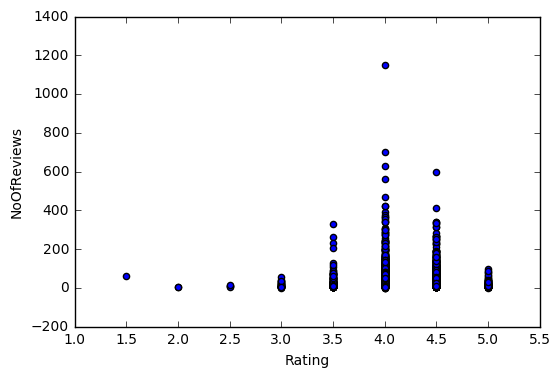

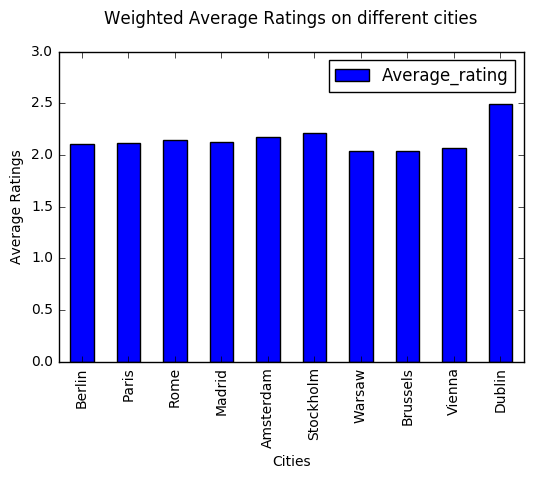

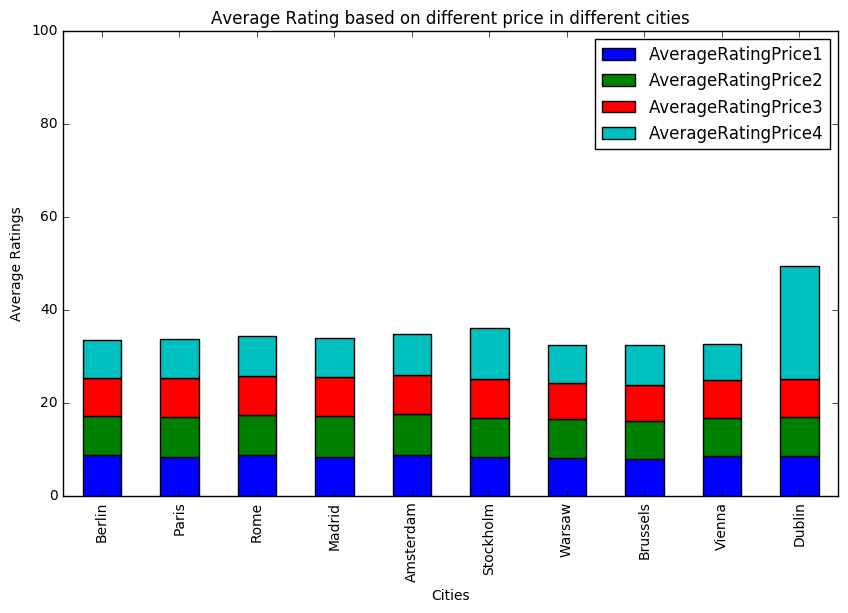

In [24]:
# Draw bar chart based on cities
def drawGraphs():
	ratingInCities.plot(kind = "bar")
	plt.title("Weighted Average Ratings on different cities\n")
	plt.ylabel("Average Ratings")
	plt.xlabel("Cities")
	x_pos = [0, 1, 2, 3,4,5,6,7,8,9]
	plt.xticks(x_pos, ratingInCities["City"])
	plt.ylim(0,3)
	plt.show()

# Draw stacked bar chart based on price in the cities
def drawStackedBar():
	p = ratingInPrice.plot.bar(stacked=True,figsize=(10, 6))
	p.set_ylim((0,100))
	p.set_xlabel("Cities")
	p.set_ylabel("Average Ratings")
	p.set_title("Average Rating based on different price in different cities")
	x_pos = [0, 1, 2, 3,4,5,6,7,8,9]
	plt.xticks(x_pos, ratingInPrice["City"])
	plt.show()

# Draw scatter plot for all reviews
def drawScatterPlot():
    buisnessfile.plot(kind="scatter",  x="Rating",   y="NoOfReviews")
    
drawGraphs()
drawStackedBar()
drawScatterPlot()

## Step 5: Qualitative Analysis: - Sentimental Analysis

In this step I've used Text-Processing API for Sentimental Analysis. I took reviews from each city and generated the sentimental score.

The output of all the sentimental score is stored in yelp_sentimental_score.csv

In [27]:
pos_score = 0
neg_score = 0
neutral_score = 0

score_outfile = open("yelp_sentimental_score.csv", "w")
score_df = pd.DataFrame(columns = ("city", "pos", "neg", "neutral"))

# This function appends the response of sentimental score to the dataframe
def generate_score(city_reivew_snippet):
	global pos_score
	global neutral_score
	global neg_score
	url = "http://text-processing.com/api/sentiment/"
	response = requests.post(url, data = {"text":city_reivew_snippet}).json()
	pos_score = pos_score + float(response["probability"]["pos"])
	neg_score = neg_score + float(response["probability"]["neg"])
	neutral_score = neutral_score + float(response["probability"]["neutral"])

# This function combines all the reviews of a city and call for sentimental score function - generate_score
def get_sentimental_score(sub_data, city):
	global pos_score
	global neutral_score
	global neg_score
	global score_df
	global score_outfile
	city_reivew_snippet = ""
	for row in sub_data.iterrows():
		city_reivew_snippet = city_reivew_snippet + str(row[1]["ReviewText"])
	num_of_char = len(city_reivew_snippet)//5
	list_city_snippet = list(map(''.join, zip(*[iter(city_reivew_snippet)]* num_of_char)))
	for snippet in list_city_snippet:
		generate_score(snippet)

	score_df = score_df.append({
		'city': city,
		'pos': (pos_score),
		'neg': (neg_score),
		'neutral': (neutral_score)
		}, ignore_index = True)

# This function do the cleanup part and calling the sentimental function
def preprocess_data():
	global pos_score
	global neutral_score
	global neg_score
	data = pd.read_csv("qualitative_analysis.csv", sep = "\t")
	cities = list(set(data["City"].tolist()))
	cities.remove("City of Brussels")
	cities.remove("Warszawa")
	cities.remove("Etterbeek")
	cities.remove("Saint-Gilles")
	for city in cities:
		print("Processing for city: ", city)
		sub_data =  data[ (data["City"] == city) ]
		pos_score = 0
		neutral_score = 0
		neg_score = 0
		get_sentimental_score(sub_data, city)
	score_df.to_csv(score_outfile, sep = "\t", encoding = "utf-8")

preprocess_data()

Processing for city:  Stockholm
Processing for city:  Berlin
Processing for city:  Vienna
Processing for city:  Rome
Processing for city:  Madrid
Processing for city:  Warsaw
Processing for city:  Dublin
Processing for city:  Brussels
Processing for city:  Amsterdam
Processing for city:  Paris


## Step 6: Graphical representation of the Sentimental Analysis

Here I've generated the line graph which shows about sentiments of people's review in different cities.

We can see that maximum positive sentiments are from people of Paris while maximum negative sentiments are from people of Dublin, Amsterdam and Brussels.


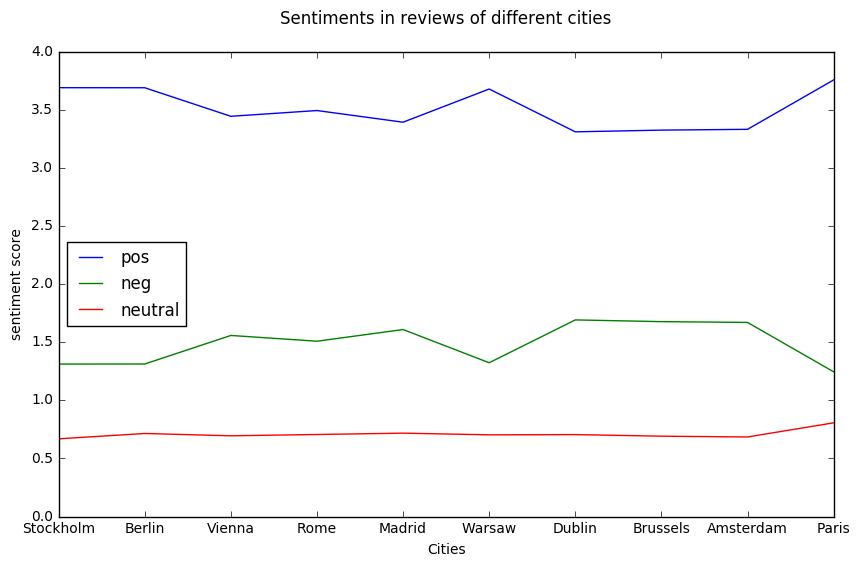

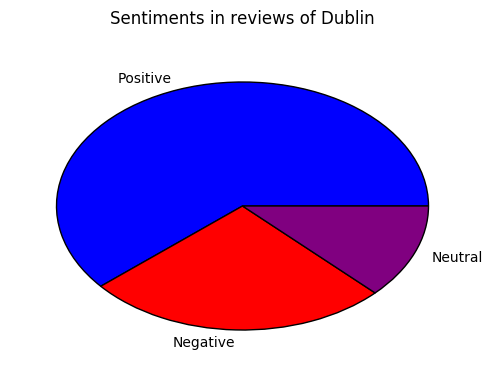

In [34]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

sentimentFile = pd.read_csv("yelp_sentimental_score.csv", sep='\t')

sentimentFile.drop("Unnamed: 0", axis = 1, inplace = True)

# Code to get the pieChart of a specific city Dublin.
def pieChart():
	npObj = np.array(sentimentFile)
	dublinSentimentDetails = [npObj[3][1], npObj[3][2], npObj[3][3]]
	sentiments = ["Positive","Negative","Neutral"]
	plt.figure()
	mycolors=["blue","red","purple"]
	plt.title("Sentiments in reviews of Dublin\n")
	p = plt.pie(dublinSentimentDetails,labels=sentiments,colors=mycolors)
	plt.show()

# Code for line chart to represent different sentiment values from each city.
def drawGraphs():
	sentimentFile.plot(figsize=(10, 6))
	plt.title("Sentiments in reviews of different cities\n")
	plt.ylabel("sentiment score")
	plt.xlabel("Cities")
	x_pos = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
	plt.xticks(x_pos, sentimentFile["city"])
	plt.ylim(0,4)
	plt.show()

drawGraphs()
pieChart()

## Conclusion:

From the Quantitative Analysis, though Dublin is the clear winner. Unlike according to the Qualitative analysis, Paris has topped follwed by Stolkholm and Warsaw. Hence, from this experiment signifies the impact of user reviews sentiments in the rankings of the cities based on the Restaurants ratings.

Note: This experiment is conducted with samples of 200 Business from each city. 